In [1]:
#importing necessery libraries for future analysis of the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
#import nltk
#To open dialog download:
#nltk.download();
#To downlaod just stopwords:
#nltk.download('stopwords');


import nltk

import nltk.corpus
# two types of stemmers. PorterStemmer algorithm from 1979. PorterStemmer uses Suffix Stripping to produce stems. 

from nltk.stem import PorterStemmer
#PorterStemmer algorithm does not follow linguistics rather a set of 05 rules for different cases that are applied in phases
#(step by step) to generate stems. 
#This is the reason why PorterStemmer does not often generate stems that are actual English words.
#It does not keep a lookup table for actual stems of the word but applies algorithmic rules to generate stems.
#PorterStemmer is known for its simplicity and speed. 

from nltk.stem import LancasterStemmer
#The LancasterStemmer (Paice-Husk stemmer) is an iterative algorithm with rules saved externally.
#One table containing about 120 rules indexed by the last letter of a suffix. 
#On each iteration, it tries to find an applicable rule by the last character of the word. 
#Each rule specifies either a deletion or replacement of an ending. If there is no such rule, it terminates. 
#It also terminates if a word starts with a vowel and there are only two letters left
#or if a word starts with a consonant and there are only three characters left. 
#Otherwise, the rule is applied, and the process repeats.
#LancasterStemmer is simple, but heavy stemming due to iterations and over-stemming may occur. 
#Over-stemming causes the stems to be not linguistic, or they may have no meaning.



from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\luisl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\luisl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\luisl\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\luisl\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\luisl\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [2]:
#airbnb-listings.csv
#using pandas library and 'read_csv' function to read csv file 
airbnb_listings=pd.read_csv('listings.csv')
#examing head of csv file 
airbnb_listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
1,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,279,2019-08-29,4.62,1,192
2,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
3,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,75,2019-07-21,0.59,1,13
4,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.39,1,0


In [3]:
len(airbnb_listings)

48377

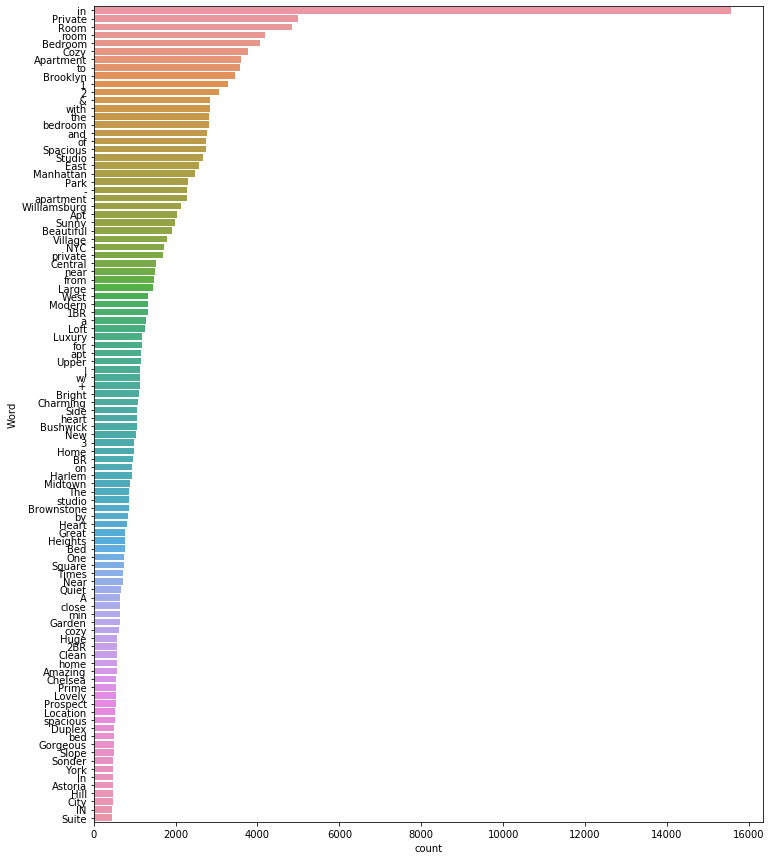

In [4]:
all_words_from_description = []
def freq_words(x, terms = 30): 
  all_words = ' '.join([str(text) for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # selecting top 20 most frequent words 
  d = words_df.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
  plt.figure(figsize=(12,15)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  #plt.show()
  return all_words
  

# print 100 most frequent words 
all_words_from_description = freq_words(airbnb_listings['name'], 100)

In [5]:
all_words_from_description


['THE',
 'VILLAGE',
 'OF',
 'HARLEM....NEW',
 'YORK',
 '!',
 'Cozy',
 'Entire',
 'Floor',
 'of',
 'Brownstone',
 'Entire',
 'Apt:',
 'Spacious',
 'Studio/Loft',
 'by',
 'central',
 'park',
 'Large',
 'Cozy',
 '1',
 'BR',
 'Apartment',
 'In',
 'Midtown',
 'East',
 'BlissArtsSpace!',
 'Large',
 'Furnished',
 'Room',
 'Near',
 "B'way",
 'Cozy',
 'Clean',
 'Guest',
 'Room',
 '-',
 'Family',
 'Apt',
 'Best',
 'Hideaway',
 'Cute',
 '&',
 'Cozy',
 'Lower',
 'East',
 'Side',
 '1',
 'bdrm',
 'Beautiful',
 '1br',
 'on',
 'Upper',
 'West',
 'Side',
 'Central',
 'Manhattan/near',
 'Broadway',
 'Lovely',
 'Room',
 '1,',
 'Garden,',
 'Best',
 'Area,',
 'Legal',
 'rental',
 'Wonderful',
 'Guest',
 'Bedroom',
 'in',
 'Manhattan',
 'CENTRAL',
 'PARK',
 'West',
 'Village',
 'Nest',
 '-',
 'Superhost',
 'Only',
 '2',
 'stops',
 'to',
 'Manhattan',
 'studio',
 'Perfect',
 'for',
 'Your',
 'Parents',
 '+',
 'Garden',
 'Chelsea',
 'Perfect',
 'by',
 'Doti,',
 'an',
 'AIRBNB',
 'Super',
 'Host!',
 'Hip',
 'H

In [6]:

stop_words = set(stopwords.words('english'))



all_words_no_stop_words = [w for w in all_words_from_description if not w in stop_words]

In [7]:
all_words_no_stop_words

['THE',
 'VILLAGE',
 'OF',
 'HARLEM....NEW',
 'YORK',
 '!',
 'Cozy',
 'Entire',
 'Floor',
 'Brownstone',
 'Entire',
 'Apt:',
 'Spacious',
 'Studio/Loft',
 'central',
 'park',
 'Large',
 'Cozy',
 '1',
 'BR',
 'Apartment',
 'In',
 'Midtown',
 'East',
 'BlissArtsSpace!',
 'Large',
 'Furnished',
 'Room',
 'Near',
 "B'way",
 'Cozy',
 'Clean',
 'Guest',
 'Room',
 '-',
 'Family',
 'Apt',
 'Best',
 'Hideaway',
 'Cute',
 '&',
 'Cozy',
 'Lower',
 'East',
 'Side',
 '1',
 'bdrm',
 'Beautiful',
 '1br',
 'Upper',
 'West',
 'Side',
 'Central',
 'Manhattan/near',
 'Broadway',
 'Lovely',
 'Room',
 '1,',
 'Garden,',
 'Best',
 'Area,',
 'Legal',
 'rental',
 'Wonderful',
 'Guest',
 'Bedroom',
 'Manhattan',
 'CENTRAL',
 'PARK',
 'West',
 'Village',
 'Nest',
 '-',
 'Superhost',
 'Only',
 '2',
 'stops',
 'Manhattan',
 'studio',
 'Perfect',
 'Your',
 'Parents',
 '+',
 'Garden',
 'Chelsea',
 'Perfect',
 'Doti,',
 'AIRBNB',
 'Super',
 'Host!',
 'Hip',
 'Historic',
 'Brownstone',
 'Apartment',
 'Backyard',
 'Hug

['THE',
 'VILLAGE',
 'OF',
 'HARLEM....NEW',
 'YORK',
 '!',
 'Cozy',
 'Entire',
 'Floor',
 'Brownstone',
 'Entire',
 'Apt:',
 'Spacious',
 'Studio/Loft',
 'central',
 'park',
 'Large',
 'Cozy',
 '1',
 'BR',
 'Apartment',
 'In',
 'Midtown',
 'East',
 'BlissArtsSpace!',
 'Large',
 'Furnished',
 'Room',
 'Near',
 "B'way",
 'Cozy',
 'Clean',
 'Guest',
 'Room',
 '-',
 'Family',
 'Apt',
 'Best',
 'Hideaway',
 'Cute',
 '&',
 'Cozy',
 'Lower',
 'East',
 'Side',
 '1',
 'bdrm',
 'Beautiful',
 '1br',
 'Upper',
 'West',
 'Side',
 'Central',
 'Manhattan/near',
 'Broadway',
 'Lovely',
 'Room',
 '1,',
 'Garden,',
 'Best',
 'Area,',
 'Legal',
 'rental',
 'Wonderful',
 'Guest',
 'Bedroom',
 'Manhattan',
 'CENTRAL',
 'PARK',
 'West',
 'Village',
 'Nest',
 '-',
 'Superhost',
 'Only',
 '2',
 'stops',
 'Manhattan',
 'studio',
 'Perfect',
 'Your',
 'Parents',
 '+',
 'Garden',
 'Chelsea',
 'Perfect',
 'Doti,',
 'AIRBNB',
 'Super',
 'Host!',
 'Hip',
 'Historic',
 'Brownstone',
 'Apartment',
 'Backyard',
 'Hug

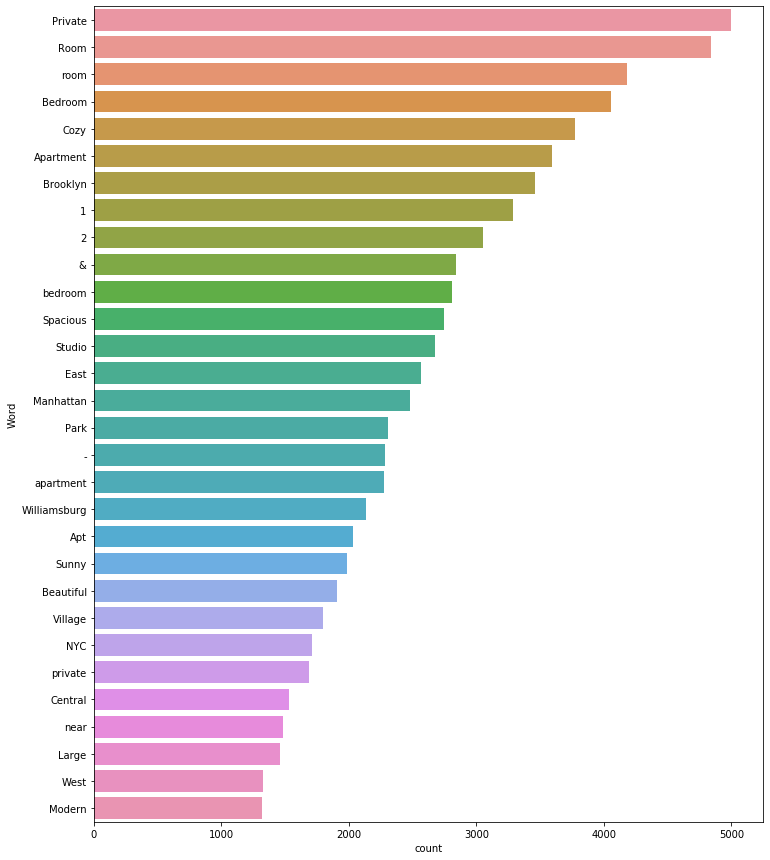

In [8]:
freq_words(all_words_no_stop_words)

In [9]:
all_words_no_digits_no_stop_words = []
no_digits = [x.translate(str.maketrans('','',"0123456789")) for x in all_words_no_stop_words ]

for item in no_digits:
    all_words_no_digits_no_stop_words.append(item)

['THE',
 'VILLAGE',
 'OF',
 'HARLEM....NEW',
 'YORK',
 '!',
 'Cozy',
 'Entire',
 'Floor',
 'Brownstone',
 'Entire',
 'Apt:',
 'Spacious',
 'Studio/Loft',
 'central',
 'park',
 'Large',
 'Cozy',
 'BR',
 'Apartment',
 'In',
 'Midtown',
 'East',
 'BlissArtsSpace!',
 'Large',
 'Furnished',
 'Room',
 'Near',
 "B'way",
 'Cozy',
 'Clean',
 'Guest',
 'Room',
 '-',
 'Family',
 'Apt',
 'Best',
 'Hideaway',
 'Cute',
 '&',
 'Cozy',
 'Lower',
 'East',
 'Side',
 'bdrm',
 'Beautiful',
 'br',
 'Upper',
 'West',
 'Side',
 'Central',
 'Manhattan/near',
 'Broadway',
 'Lovely',
 'Room',
 ',',
 'Garden,',
 'Best',
 'Area,',
 'Legal',
 'rental',
 'Wonderful',
 'Guest',
 'Bedroom',
 'Manhattan',
 'CENTRAL',
 'PARK',
 'West',
 'Village',
 'Nest',
 '-',
 'Superhost',
 'Only',
 'stops',
 'Manhattan',
 'studio',
 'Perfect',
 'Your',
 'Parents',
 '+',
 'Garden',
 'Chelsea',
 'Perfect',
 'Doti,',
 'AIRBNB',
 'Super',
 'Host!',
 'Hip',
 'Historic',
 'Brownstone',
 'Apartment',
 'Backyard',
 'Huge',
 'BR',
 'Upper',

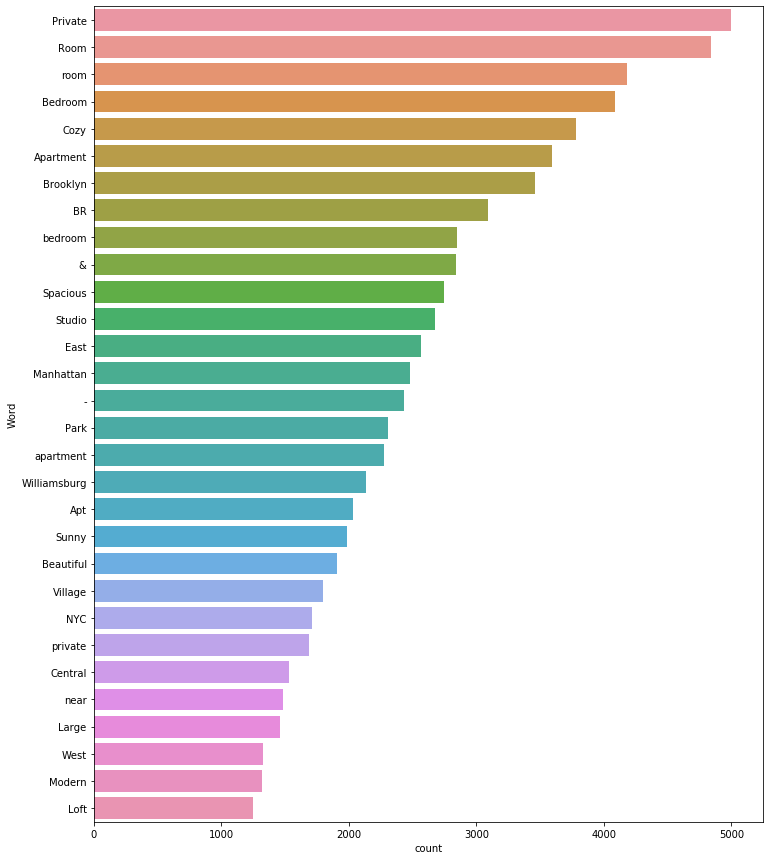

In [10]:
freq_words(all_words_no_digits_no_stop_words)